In [6]:
import pandas as pd
df_index=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Complete-Data-Science-With-Machine-Learning-And-NLP-2024/refs/heads/main/3-Complete%20Linear%20Regression/Practicals/economic_index.csv')

In [7]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [9]:
import numpy as np
import matplotlib.pyplot as plt

#drop unnecessary columns

df_index.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace=True)

In [11]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

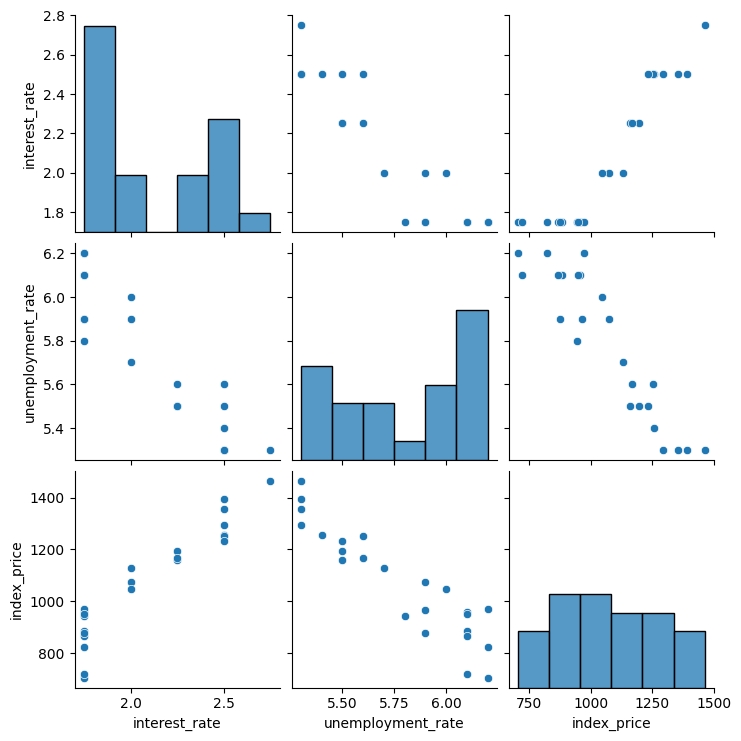

In [12]:
import seaborn as sns
sns.pairplot(df_index)

In [16]:
hm=df_index.corr()

<Axes: >

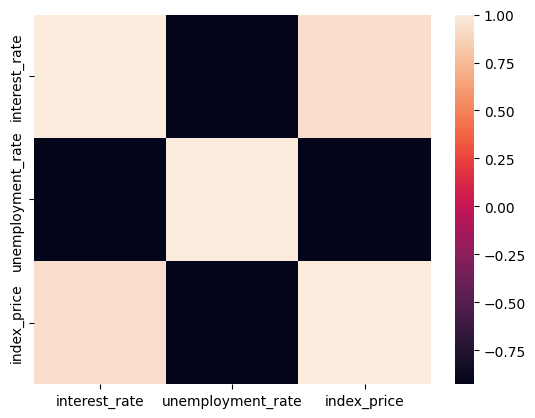

In [17]:
sns.heatmap(hm)

Text(0, 0.5, 'unemployment rate')

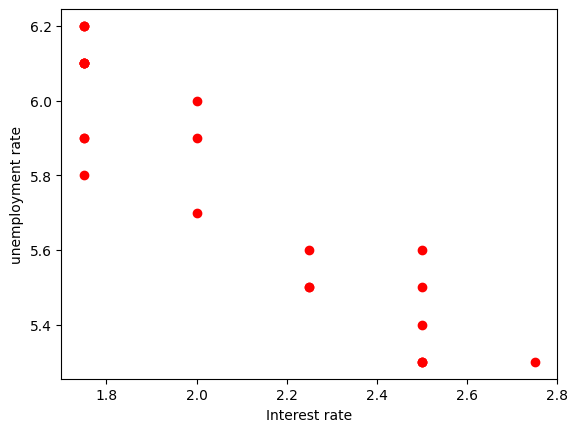

In [20]:
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel('Interest rate')
plt.ylabel('unemployment rate')

In [22]:
# X=df_index[['interest_rate','unemployment rate']] # this is one way

X = df_index.iloc[:,:-1]
y = df_index.iloc[:,-1] 

In [25]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)

<Axes: xlabel='interest_rate', ylabel='index_price'>

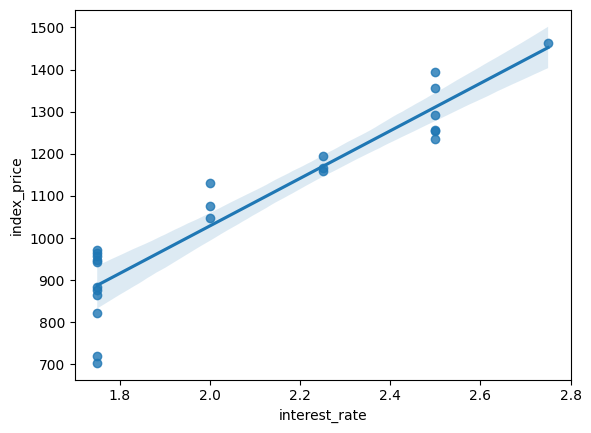

In [34]:
sns.regplot(x=df_index['interest_rate'],y=df_index['index_price'])

In [35]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [43]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [44]:
X_test

array([[ 0.36115756, -0.82078268],
       [-1.08347268,  1.33377186],
       [ 1.8057878 , -1.43636969],
       [-1.08347268,  1.02597835],
       [-0.36115756,  0.41039134],
       [ 0.36115756, -0.51298918]])